In [39]:
from sklearn.datasets import load_boston

In [122]:
X, y = load_boston(return_X_y=True)
len(X)

506

In [41]:
from sklearn.neighbors import KNeighborsRegressor

In [42]:
model = KNeighborsRegressor()

In [43]:
model.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [44]:
result = model.predict(X)

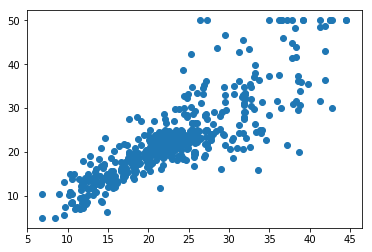

In [45]:
import matplotlib.pyplot as plt
plt.scatter(result, y)

In [ ]:
# model fit badly

In [57]:
# the dims to scale for the equal weights 

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd

# pipeline 和 网格搜索 来获取最合理的超参数

In [123]:
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model",KNeighborsRegressor(n_neighbors=3))
])
print(pipe.get_params())
model_G = GridSearchCV(estimator=pipe, param_grid={'model__n_neighbors':[1,2,3,4,5,6,7,8,9,10]}, cv=2, return_train_score=True)

{'memory': None, 'steps': [('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform'))], 'scale': StandardScaler(copy=True, with_mean=True, with_std=True), 'model': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform'), 'scale__copy': True, 'scale__with_mean': True, 'scale__with_std': True, 'model__algorithm': 'auto', 'model__leaf_size': 30, 'model__metric': 'minkowski', 'model__metric_params': None, 'model__n_jobs': 1, 'model__n_neighbors': 3, 'model__p': 2, 'model__weights': 'uniform'}


In [124]:
model_G.fit(X, y)

GridSearchCV(cv=2, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [125]:
pd.DataFrame(model_G.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.002488,4.962683e-04,0.003988,5.960464e-07,1,{'model__n_neighbors': 1},0.592596,0.507079,0.549837,0.042759,4,1.000000,1.000000,1.000000,0.000000
1,0.001996,5.960464e-07,0.003495,4.920959e-04,2,{'model__n_neighbors': 2},0.595784,0.520845,0.558315,0.037469,3,0.924254,0.943121,0.933687,0.009433
2,0.002988,1.990199e-03,0.022939,1.795316e-02,3,{'model__n_neighbors': 3},0.621287,0.546187,0.583737,0.037550,1,0.874114,0.930928,0.902521,0.028407
3,0.007976,3.986239e-03,0.009486,4.478931e-03,4,{'model__n_neighbors': 4},0.612235,0.524459,0.568347,0.043888,2,0.860737,0.925390,0.893063,0.032327
4,0.003004,9.871721e-04,0.014450,1.048362e-02,5,{'model__n_neighbors': 5},0.562667,0.520362,0.541514,0.021152,5,0.835872,0.899671,0.867772,0.031900
5,0.002987,2.001524e-03,0.007484,4.974604e-04,6,{'model__n_neighbors': 6},0.533580,0.518775,0.526177,0.007402,6,0.800246,0.877414,0.838830,0.038584
6,0.002010,9.818077e-04,0.003475,1.511097e-03,7,{'model__n_neighbors': 7},0.479205,0.507968,0.493587,0.014381,7,0.775465,0.846791,0.811128,0.035663
7,0.014457,1.146793e-02,0.010989,3.997207e-03,8,{'model__n_neighbors': 8},0.464859,0.503138,0.483999,0.019139,8,0.760893,0.818340,0.789616,0.028723
8,0.003000,2.012491e-03,0.004481,1.520991e-03,9,{'model__n_neighbors': 9},0.470731,0.491811,0.481271,0.010540,10,0.761536,0.796669,0.779102,0.017567
9,0.001995,9.981394e-04,0.004782,7.883310e-04,10,{'model__n_neighbors': 10},0.479593,0.488302,0.483948,0.004355,9,0.748984,0.782848,0.765916,0.016932


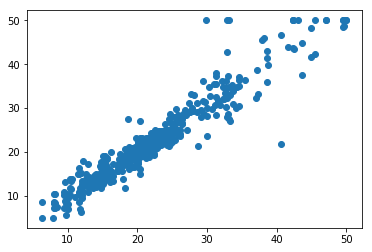

In [126]:
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model",KNeighborsRegressor(n_neighbors=3))
])
pipe.fit(X, y)
pred = pipe.predict(X)
plt.scatter(pred, y)